In [ ]:
#this colab notebook is to identify the 3 point shooters of a newer dataset from november of this year utiling regression model.

In [1]:
from google.colab import files

uploaded = files.upload()


Saving NBA_2024_per_game(28-11-2023).csv to NBA_2024_per_game(28-11-2023).csv


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496 entries, 0 to 495
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  496 non-null    object 
 1   Pos     496 non-null    object 
 2   Age     496 non-null    int64  
 3   Tm      496 non-null    object 
 4   G       496 non-null    int64  
 5   GS      496 non-null    int64  
 6   MP      496 non-null    float64
 7   FG      496 non-null    float64
 8   FGA     496 non-null    float64
 9   FG%     486 non-null    float64
 10  3P      496 non-null    float64
 11  3PA     496 non-null    float64
 12  3P%     436 non-null    float64
 13  2P      496 non-null    float64
 14  2PA     496 non-null    float64
 15  2P%     477 non-null    float64
 16  eFG%    486 non-null    float64
 17  FT      496 non-null    float64
 18  FTA     496 non-null    float64
 19  FT%     425 non-null    float64
 20  ORB     496 non-null    float64
 21  DRB     496 non-null    float64
 22  TR

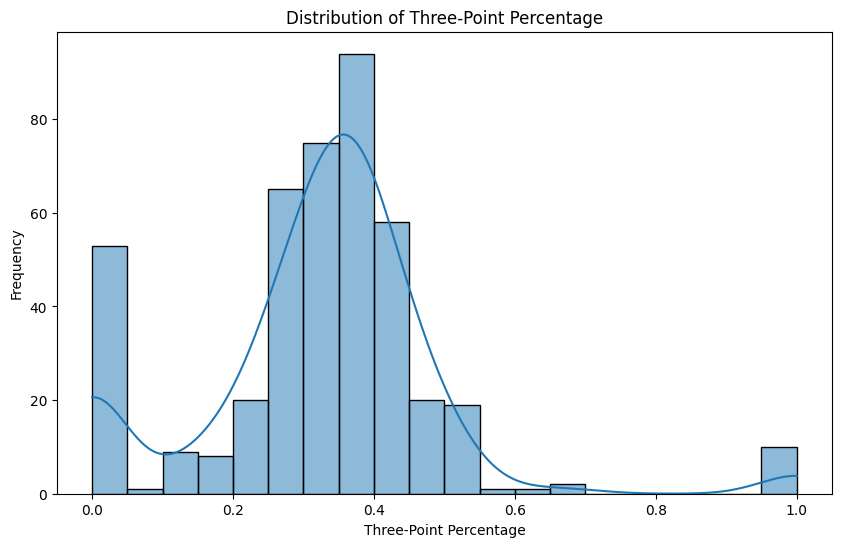

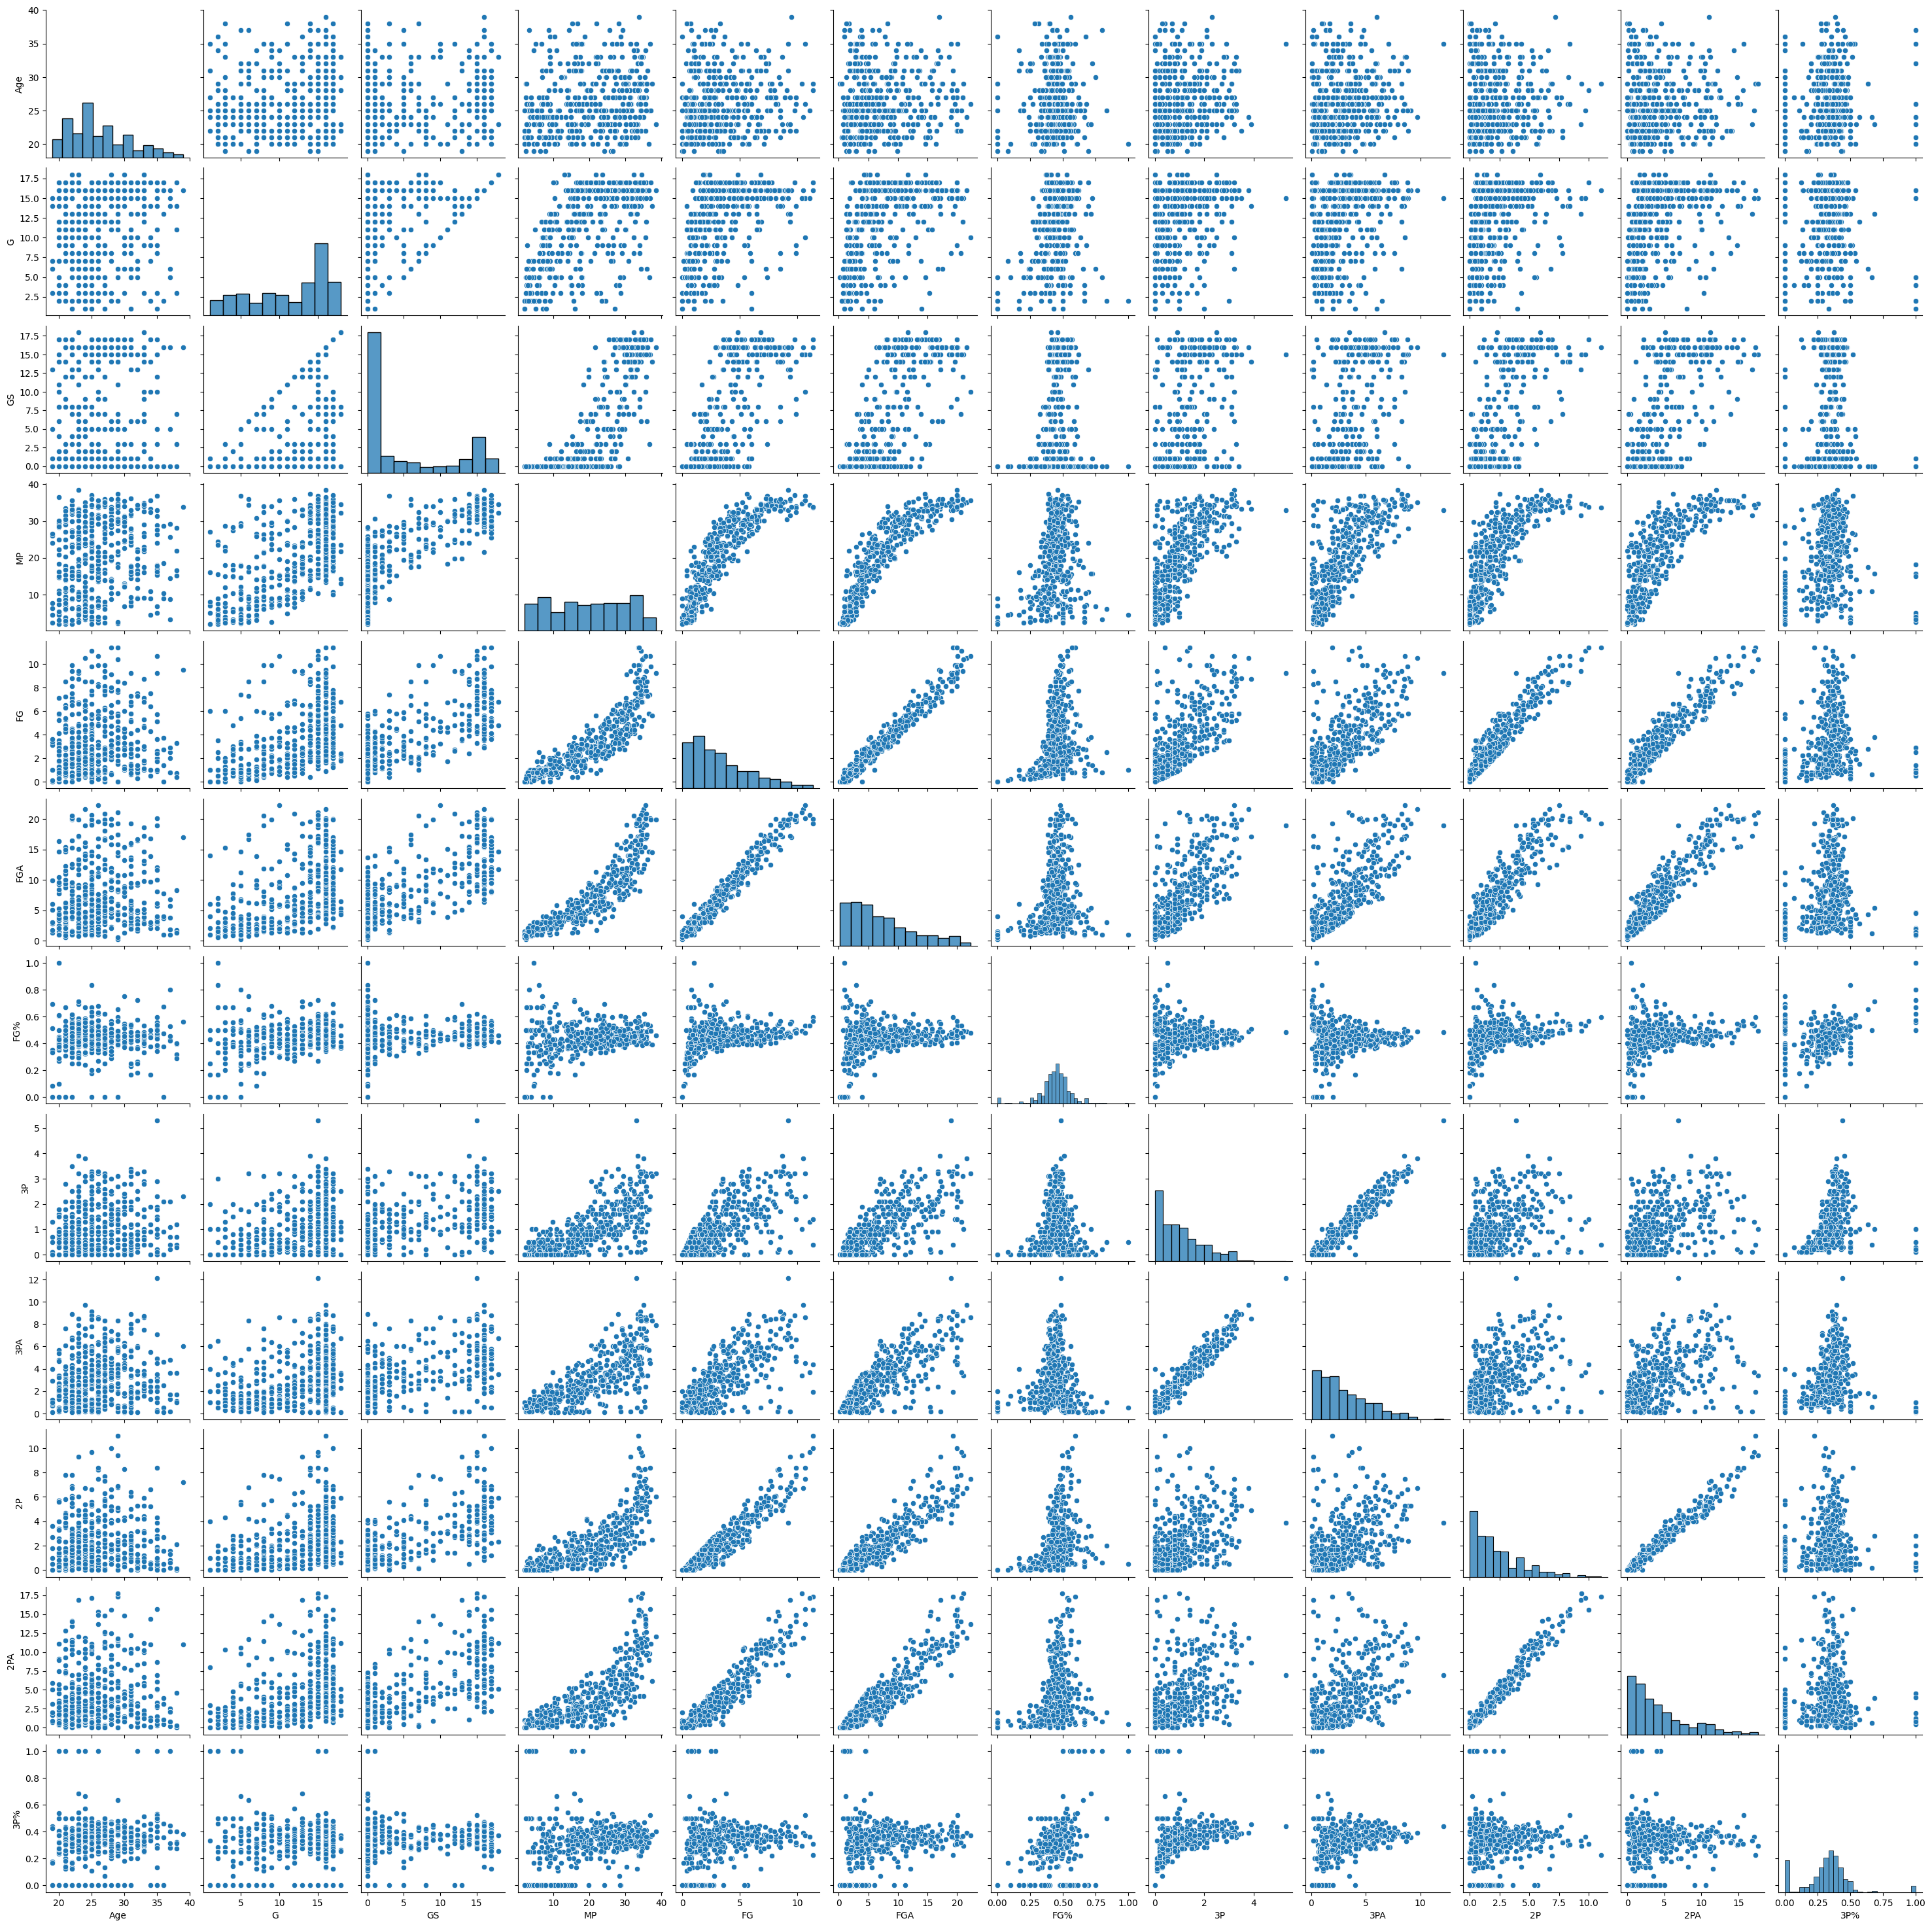

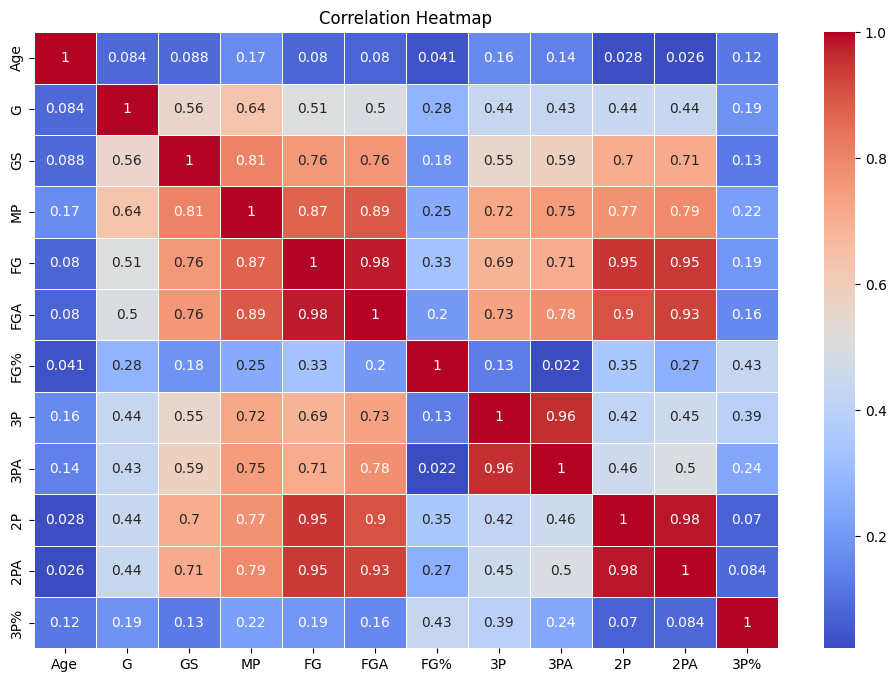

Mean Squared Error: 0.01580398882364015
R-squared: 0.4789275735177886


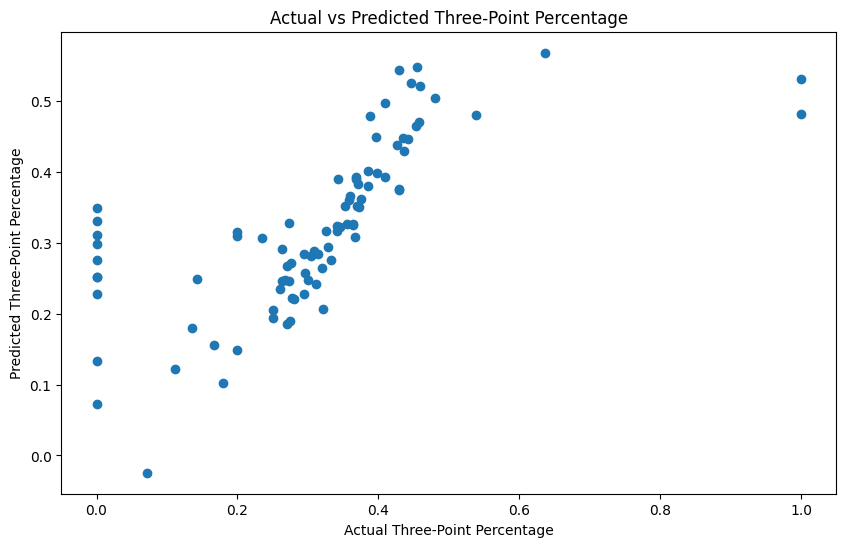

Predicted Three-Point Percentage: 0.7303773660006802


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_name = "NBA_2024_per_game(28-11-2023).csv"
df = pd.read_csv(file_name)

# Display basic information about the dataset
df.info()

# Data cleaning and preprocessing
# Drop rows with missing values in relevant columns
relevant_columns = ['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA']
df_cleaned = df[relevant_columns].dropna()

# Convert percentage to numeric if needed
if df_cleaned['3P%'].dtype == object:  # Check if the column is of object (string) type
    df_cleaned['3P%'] = pd.to_numeric(df_cleaned['3P%'].str.rstrip('%'), errors='coerce') / 100

# Visualize the distribution of Three-Point Percentage
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['3P%'], bins=20, kde=True)
plt.title('Distribution of Three-Point Percentage')
plt.xlabel('Three-Point Percentage')
plt.ylabel('Frequency')
plt.show()

# Pairplot to visualize relationships between selected features
selected_features = ['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '2P', '2PA', '3P%']
sns.pairplot(df_cleaned[selected_features])
plt.show()

# Correlation heatmap
correlation_matrix = df_cleaned[selected_features].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

# Prepare data for regression
X_reg = df_cleaned[['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '2P', '2PA']]
y_reg = df_cleaned['3P%']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Train a Linear Regression model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Make predictions
y_pred = reg_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.title('Actual vs Predicted Three-Point Percentage')
plt.xlabel('Actual Three-Point Percentage')
plt.ylabel('Predicted Three-Point Percentage')
plt.show()


# Example: predict three-point percentage for a new player
new_player_data = np.array([25, 80, 50, 30, 8, 20, 0.40, 2, 5, 6, 10]).reshape(1, -1)
predicted_percentage = reg_model.predict(new_player_data)

print(f'Predicted Three-Point Percentage: {predicted_percentage[0]}')
